# Exercise 11 : Recurrence networks (30P)

## 1.
Generate time series from the logistic map for varying parameter r : np.arange(3.5, 4, .0005) with a fixed initial value of 0.1 (resulting in 1000 time series). Each time series should have 200 values after discarding transients. Plot the time series for r = 3.5, 3.68, and 3.9 and descirbe the different types of variability. 

In [189]:
import os
os.chdir("/Users/kim-wonjin/Documents/CLEWS/Python/Nonlinear/hw11")
import numpy as np
import matplotlib.pyplot as plt
import math

In [190]:
# logistic map function
def logmap(r, x0, trans):
    a_ts = np.hstack([x0, np.zeros(trans)])
    for i in range(1, trans+1):
        a_ts[i] = r * a_ts[i-1] * (1 - a_ts[i-1]) 
    return a_ts[1001:] # trans = length including transients(1000 steps)

In [191]:
r = np.arange(3.5, 4, .0005)
ts = []
for i in r:
    ts.append(logmap(r = i, x0 = 0.1, trans = 1200))

len(ts)

1000

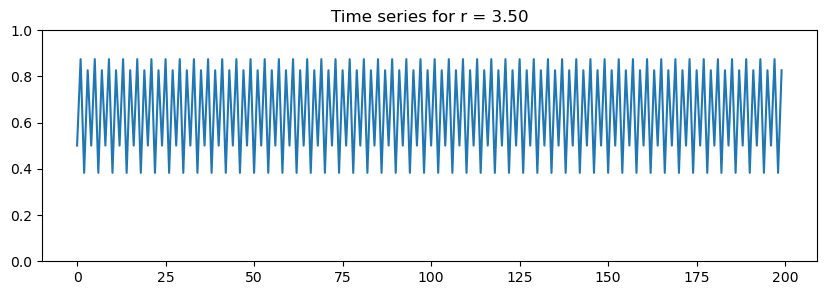

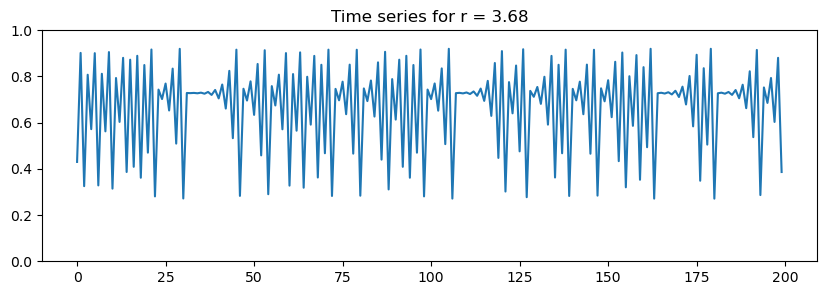

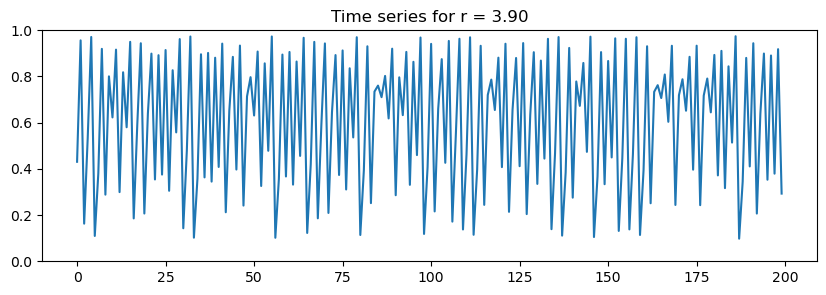

In [192]:
idx_35  = np.where(np.isclose(r, 3.5))[0][0]
idx_368 = np.where(np.isclose(r, 3.68))[0][0]
idx_39 = np.where(np.isclose(r, 3.9))[0][0]

ts_1 = ts[idx_35]
ts_2 = ts[idx_368]
ts_3 = ts[idx_39]

fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(ts_1)
ax.set_title(f"Time series for r = {r[idx_35]:.2f}")
ax.set(ylim = [0,1])
plt.show()

fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(ts_2)
ax.set_title(f"Time series for r = {r[idx_368]:.2f}")
ax.set(ylim = [0,1])
plt.show()

fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(ts_3)
ax.set_title(f"Time series for r = {r[idx_39]:.2f}")
ax.set(ylim = [0,1])
plt.show()

- r = 3.5 : The time series shows regular repeating osciliations over time.
- r = 3.68 : The time series shows mostly irregular, but there are short intervals where a more regular and structured pattern appears. These repeated interruptions of irregular behavior suggest the presence of periodic windows within a chaotic regime.
- r = 3.90 : The time series shows highly irregular fluctuations with no visible repeating pattern. it indicates fully chaotic behavior.

## 2.
Compute the Lyapunov exponent given by

$\lambda = \log r + \frac{1}{T} \sum_{t=0}^{T} \log |1 - 2x(t)|$

for each time series and plot it against r. Describe which transitions the logistic map undergoes for varying r

Hint: It may be helpful to look at the bifurcation diagram computed in exercise 4.2. (4P)

In [193]:
lamb = []
T = len(ts[0])

for i in range(len(r)):
    s = 0
    for k in range(T):
        s += np.log(np.abs(1 - (2 * ts[i][k]) ))
    lamb.append(np.log(r[i]) + (1/T * s))

# numpy version
# lamb = []
# for i in range(len(r)):
#     x = np.array(ts[i])
#     lyap = np.log(r[i]) + np.mean(np.log(np.abs(1 - 2*x)))
#     lamb.append(lyap)

In [194]:
print(f"{lamb[0]:.2f}") # Lyapnuov exponent of the first time series
# lamb[i] = the order of i timeseries (ts[i]). ts[i] have r value = r[i] and it has one unique value of Lyapnunov exponent.

-0.87


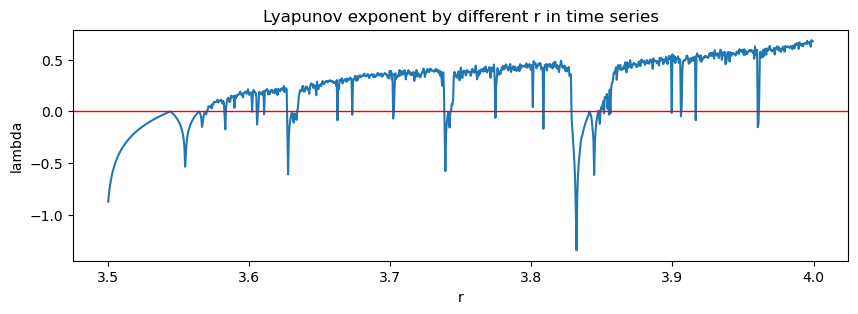

In [195]:
fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, lamb)
plt.axhline(0, lw=1, color="red")
ax.set_title("Lyapunov exponent by different r in time series")
plt.ylabel("lambda")
plt.xlabel("r")
plt.show()

Lyapunov exponent > 0 : time series is chaos.
Lyapunov exponent < 0 : time series is periodic.

the r values which have negative lambda value, represent at these r, time series is periodic. 
It is called to "Periodic window" and in this plot, between 3.5 - 3.6 (r value), 3.6-3.7, 3.7-3.8, and also the larger interval around r = 3.84.

## 3.
Embed each time series with an embedding dimension of 2 and an embedding delay of 3. 

Compute a recurrence matrix (ε=0.1) from each embedded time series. Generate recurrence networks (without self-links!) from the recurrence matrices. (6P)

In [196]:
def embed(x: np.ndarray, m: int, tau: int) -> np.ndarray:
    """Embeds a scalar time series in m dimensions with time delay tau.

    Parameters
    ----------
    x : np.ndarray
        The scalar time series
    m : int
        Embedding dimmension
    tau : int
        Time delay

    Returns
    -------
    np.ndarray
        The embedded mutli dimensional time series.
    """
    
    n = len(x)
    k = n - (m - 1) * tau
    z = np.zeros((k, m), dtype="float")
    for i in range(k):
        z[i] = [x[i + j * tau] for j in range(m)]

    return np.stack(z)

In [197]:
# embedding the time series

embed_list = []
for i in range(len(ts)):
    embed_list.append(embed(ts[i], m = 2, tau = 3))

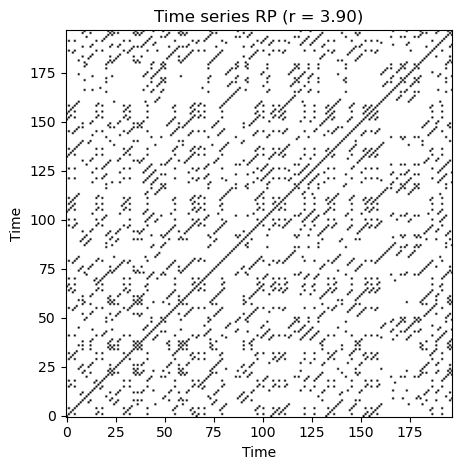

In [198]:
# recurrence matrix 

eps = 0.1
embed_list = []
R = []
for i in range(len(ts)):
    Y = embed(ts[i], m = 2, tau = 3)
    D = np.linalg.norm(Y[:, None] - Y[None, :], axis=2)
    od = np.sort(np.ravel(D))
    R.append((D < eps).astype(int)) # R[i] = Recurrence matrix when timeseries, r = r[i]

plt.imshow(R[idx_39], cmap='binary', origin='lower')
plt.title(f"Time series RP (r = {r[idx_39]:.2f})")
plt.ylabel("Time")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


In [199]:
# Recurrence Network (without self-links!)

A = []
for i in range(len(ts)):
    Y = embed(ts[i], m = 2, tau = 3)
    D = np.linalg.norm(Y[:, None] - Y[None, :], axis=2)
    od = np.sort(np.ravel(D))
    M = (D < eps).astype(int) 
    diag = np.diag_indices_from(M) # remove diagonal for avoiding calculate the distance with itself
    M[diag] = 0
    A.append(M) # A[i] = Recurrence network when timeseries, r = r[i]

## 4.
Study how the recurrence rate (RR) varies with r. 

Identify a recurrence network measure that corresponds to RR. Are there transitions indicated by the Lyapunov exponent which cannot be detected by these two quantifiers? (4P)

$RR = \frac{1}{N^2} \sum_{i,j} R_{ij}$

In [200]:
N = len(R[0])
RR = []
for i in range(len(R)):
    Ri = R[i]
    RR.append(np.sum(Ri)/(N*N))

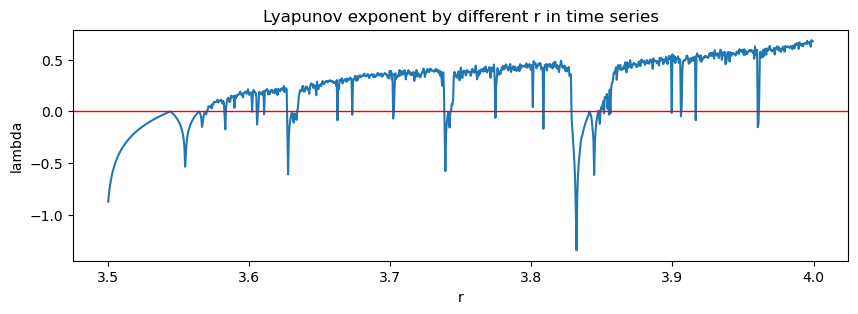

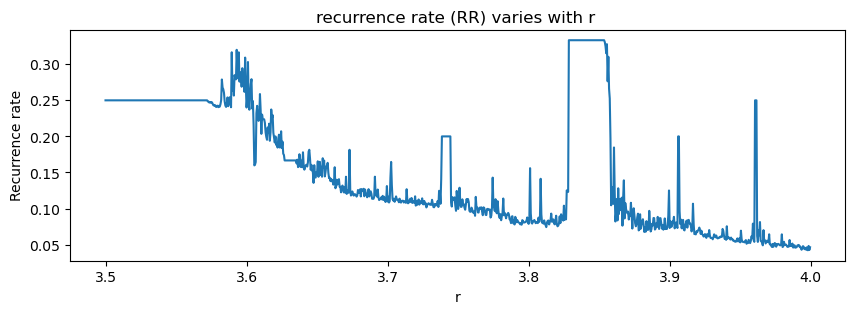

In [201]:
fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, lamb)
plt.axhline(0, lw=1, color="red")
ax.set_title("Lyapunov exponent by different r in time series")
plt.ylabel("lambda")
plt.xlabel("r")
plt.show()

fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, RR)
ax.set_title("recurrence rate (RR) varies with r ")
plt.ylabel("Recurrence rate")
plt.xlabel("r")
plt.show()

In the periodic window, (especially between r = 3.8 and 3.9) it has the largest recurrence rate (over 30 %)

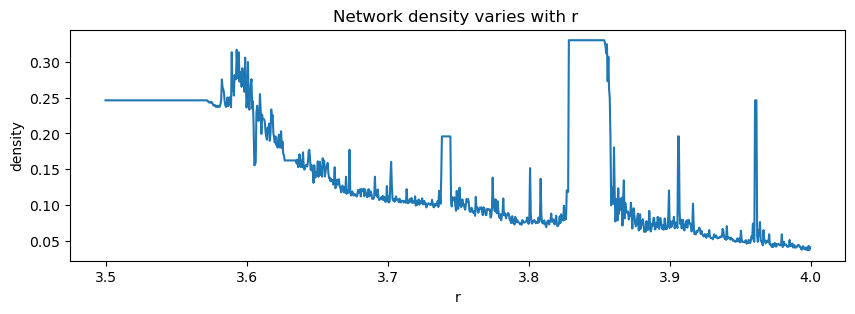

In [202]:
# link density in Recurrence Network
import networkx as nx

density = []
for i in range(len(A)):
    Ai = A[i]
    G0 = nx.from_numpy_array(Ai)
    density.append(nx.density(G0))

fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, density)
ax.set_title("Network density varies with r ")
plt.ylabel("density")
plt.xlabel("r")
plt.show()

In Recurrence Network, diffrent with Recurrence Matrix, network density - how many nodes are connected each ohter - represent as like a recurrence rate in Matrix.

Although RR (and the corresponding network density) capture the overall phase-space concentration of states, they are insensitive to changes in the dynamical structure of the system.

## 4.
Study how determinism (DET) varies with r. Identify two different network measures that correspond to DET and check whether there are differences in the detected transitions. Which measures perform better? How do they perform compared to the Lyapunov exponent? (6P)

The Determinism (DET) represents the ratio of recurrence points that form diagonal structures in the recurrence plot. It quantifies the predictability of the system.

$ DET = \frac{\sum_{l \ge l_{min}} l P(l)}{\sum_{i,j} R_{ij}} $


$P(l)$: The frequency distribution of the lengths $l$ of the diagonal lines (the number of diagonal lines with length $l$).

$l_{min}$: The minimum length threshold for a diagonal line to be considered (typically set to $2$).

In [203]:
def DET_cal(Matrix, lmin=2):
    N = Matrix.shape[0]
    det_sum = 0
    total_rec = np.sum(Matrix)

    for k in range(-N+1, N):
        diag = np.diagonal(Matrix, offset=k)
        
        length = 0
        for val in diag:
            if val == 1:
                length += 1
            else:
                if length >= lmin:
                    det_sum += length
                length = 0
        
        if length >= lmin:
            det_sum += length

    return det_sum / total_rec if total_rec > 0 else 0

In [204]:
N = len(R[0])
DET = []
for i in range(len(R)):
    Ri = R[i]
    DET.append(DET_cal(R[i], lmin=2))

- Periodic : larger DET
- Chaotic : smaller DET
- Periodic window : DET suddenly change to larger value

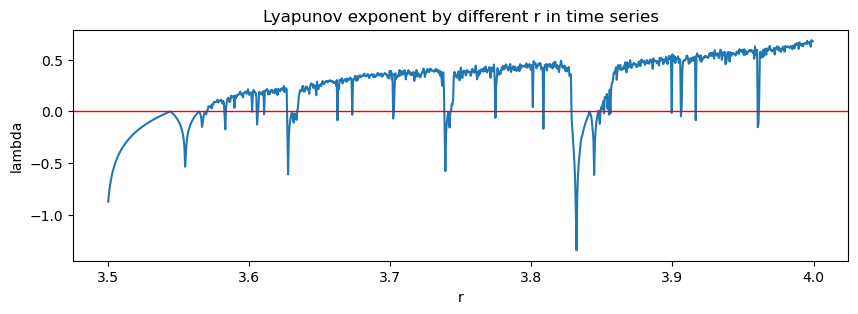

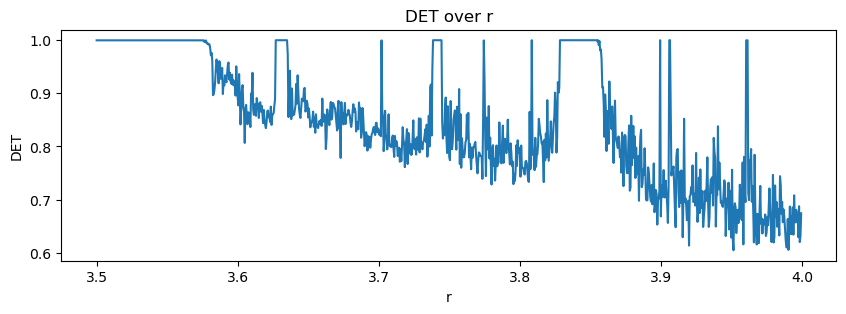

In [205]:
fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, lamb)
plt.axhline(0, lw=1, color="red")
ax.set_title("Lyapunov exponent by different r in time series")
plt.ylabel("lambda")
plt.xlabel("r")
plt.show()

fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, DET)
ax.set_title("DET over r")
plt.ylabel("DET")
plt.xlabel("r")
plt.show()

Comparing to RR, DET detects the transitions of Lyapunov exponent very well. 

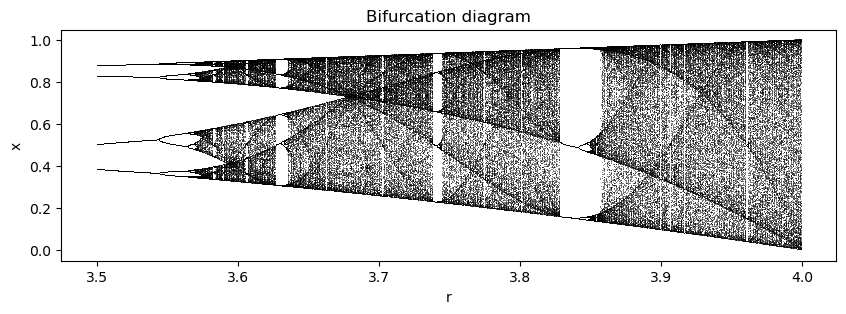

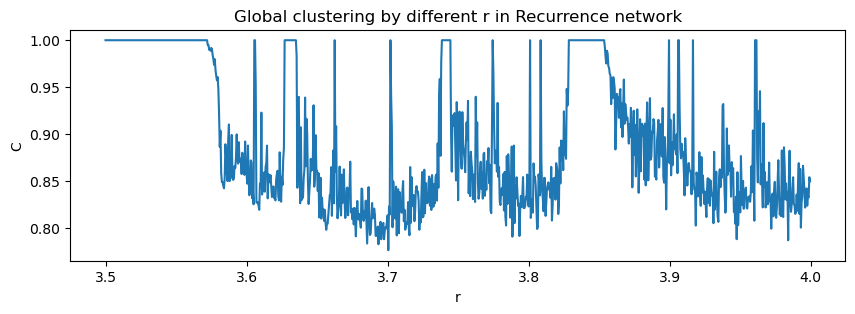

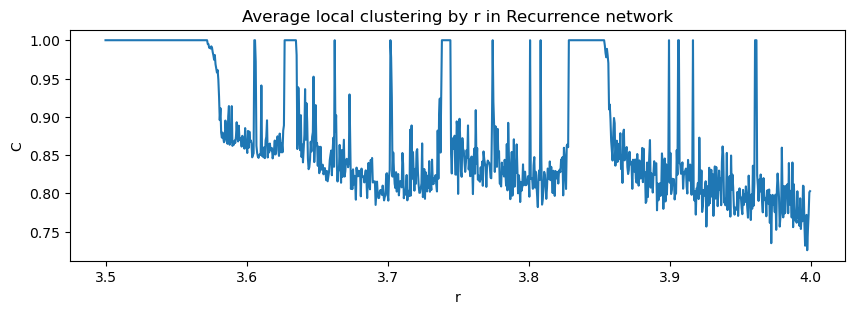

In [206]:
# Bifurcation diagram

R_plot = []
X_plot = []

for idx, r_val in enumerate(r):
    for x in ts[idx]: 
        R_plot.append(r_val)
        X_plot.append(x)

plt.figure(figsize=(10,3))
plt.plot(R_plot, X_plot, ',k', alpha=0.5)
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation diagram')
plt.show()

# Clustering coefficient - Global (Transitivity)

C1 = []
for i in range(len(A)):
    Ai = A[i]
    G0 = nx.from_numpy_array(Ai)
    C1.append(nx.transitivity(G0))
    
fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, C1)
ax.set_title("Global clustering by different r in Recurrence network")
plt.ylabel("C")
plt.xlabel("r")
plt.show()

# Average local clustering coefficient

C2 = []
for i in range(len(A)):
    Ai = A[i]
    G0 = nx.from_numpy_array(Ai)
    C2.append(nx.average_clustering(G0))
    
fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, C2)
ax.set_title("Average local clustering by r in Recurrence network")
plt.ylabel("C")
plt.xlabel("r")
plt.show()

Large clustering coefficient means various nodes are connected and gathered each other, making the triangle a lot.
It is more sensitively detect the transitions, comparing to DET and also Lyapunov exponent.

# 6.
Compute lacunarity for a fixed box size of w=5 for each recurrence matrix and study how it varies with r. 

Define a function that returns a corresponding “network analogy” to lacunarity, defined as the standard deviation of all node degrees of the recurrence network divided by the average node degree. 

Compare both. Is there a transition that the other measures have missed but which can be identified with this pair of measures? (7P)

- Lacunarity : Heterogenity of spatial patterns on Recurrence plot.
- Recurrence Rate : Number of 1 (density)
- DET : the length of diagnoals

Definition of Lacunarity : in w x w size box, counting the number of 1's distribution
- Periodic : smaller Lacunarity (uniform)
- Chaotic : Larger Lacunarity (heterogenic)

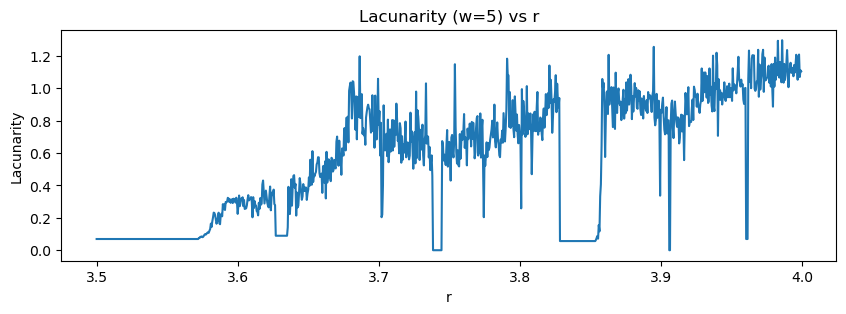

In [ ]:
def Lacunarity(Matrix, w):
    N = Matrix.shape[0]
    counts = []

    for i in range(N - w + 1):
        for j in range(N - w + 1):
            box = Matrix[i:i+w, j:j+w]
            counts.append(np.sum(box))

    counts = np.array(counts)
    mu = np.mean(counts)
    sigma = np.std(counts)

    return sigma / mu

Lacu_list = []
for i in range(len(R)):
    Lacu_list.append(Lacunarity(R[i], 5))

fig, ax = plt.subplots(figsize = (10, 3)) 
ax.plot(r, Lacu_list)
ax.set_title("Lacunarity (w=5) vs r")
plt.ylabel("Lacunarity")
plt.xlabel("r")
plt.show()

In [209]:
def network_lacunarity_nx(A):
    G = nx.from_numpy_array(A)
    
    degrees = np.array([d for _, d in G.degree()])
    
    mu = np.mean(degrees)
    sigma = np.std(degrees)
    
    return sigma / mu

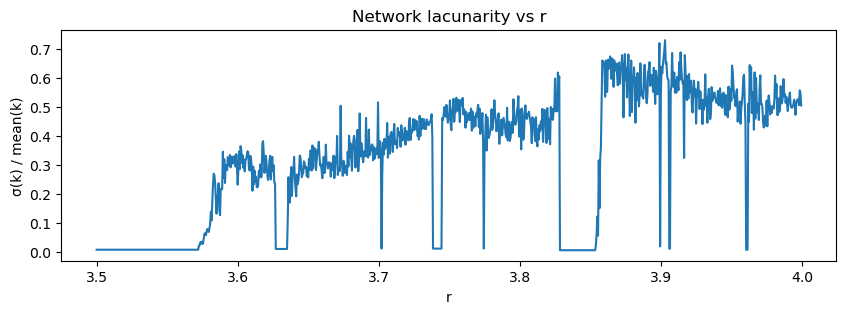

In [210]:
net_lacu = []

for Ai in A:
    net_lacu.append(network_lacunarity_nx(Ai))

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(r, net_lacu)
ax.set_title("Network lacunarity vs r")
plt.ylabel("σ(k) / mean(k)")
plt.xlabel("r")
plt.show()

The matrix lacunarity and its network analogue show very similar behavior as functions of r, with low values in periodic regimes and higher values in chaotic regimes,
Compared to RR/network density, which mainly captures the overall recurrence/link density, this pair is more sensitive to changes in the heterogeneity of the recurrence structure and the degree distribution.